# Grouping Data

## Steps in script

#### 1. Creating Data Frame
#### 2. Grouping by department_id & mean of order_number
#### 3. Creating Loyalty Flag
#### 4. Checking statistics of product prices based on Loyalty Flags
#### 4a. Checking statistics of product prices based on Loyalty Flags after cleaning values
#### 5. Creating spend_cat flag
#### 6. Creating order_frequency flag

In [116]:
# Importing libraries

import pandas as pd
import numpy as np
import os

#### 1. Creating Data Frame

In [118]:
path = r"C:\Users\David\Desktop\CareerFoundry\Achievement 4\Instacart Basket Analysis"

ords_prods_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products.pkl'))

#### 2. Grouping by department_id & mean of order_number

In [119]:
ords_prods_merged.groupby('department_id')['order_number'].mean().reset_index()

,department_id,order_number
0,1,15.457687
1,2,17.277920
2,3,17.179756
3,4,17.811403
4,5,15.213779
5,6,16.439806
6,7,17.225773
7,8,15.340520
8,9,15.895474
9,10,20.197148


Including all rows in the Data Frame for the groupby function lowered the mean value of almost every department observed in both instances of the Data Frame. department_id 17 rose from ~11.3 in the subset to ~15.7 in the entirity of the Data Frame. This could be an example of the Law of Large Numbers pushing observations closer to the true mean.

#### 3. Creating Loyalty Flag

In [120]:
# Creating max_order column with transform function after grouping by user_id column

ords_prods_merged['max_order'] = ords_prods_merged.groupby('user_id').order_number.transform(np.max)

# Assigning flag value based on max_order value

ords_prods_merged.loc[ords_prods_merged['max_order'] > 40, 'loyalty_flag'] = 'Loyal customer'
ords_prods_merged.loc[(ords_prods_merged['max_order'] <= 40) & (ords_prods_merged['max_order'] > 10), 'loyalty_flag'] = 'Regular customer'
ords_prods_merged.loc[ords_prods_merged['max_order'] <= 10, 'loyalty_flag'] = 'New customer'

In [123]:
# Verifying frequency of loyalty_flag values

ords_prods_merged.loyalty_flag.value_counts()

Regular customer    15891077
Loyal customer      10293737
New customer         6249398
Name: loyalty_flag, dtype: int64

#### 4. Checking statistics of product prices based on Loyalty Flags

In [104]:
# Grouping by loyalty_flag column and using the agg function to check min, max and mean of the prices column

ords_prods_merged.groupby('loyalty_flag').agg({'prices':['min', 'max', 'mean']}).reset_index()

loyalty_flag prices                    
                       min      max       mean
0    Loyal customer    1.0  99999.0  10.388747
1      New customer    1.0  99999.0  13.294370
2  Regular customer    1.0  99999.0  12.496203

#### 4a. Checking statistics of product prices based on Loyalty Flags after cleaning values

In [105]:
# Creating a copy of the ords_prods_merged Data Frame called df

df = ords_prods_merged

# Creating a list of product ids that contain price values that are incorrect and causing skew

skew_prods = list(df[df.prices > 30].groupby('product_id').aisle_id.count().reset_index()['product_id'])

In [106]:
print(skew_prods)

# Using a for loop to change prices column for skewed values

for prod in skew_prods:
    df.loc[df.product_id == prod, 'prices'] = df.prices * .0001

[21553, 33664]


In [107]:
# Grouping by loyalty_flag column and using the agg function to check min, max and mean of the prices column 
# in corrected Data Frame

df.groupby('loyalty_flag').agg({'prices':['min', 'max', 'mean']}).reset_index()

loyalty_flag prices                
                       min   max      mean
0    Loyal customer    1.0  25.0  7.777690
1      New customer    1.0  25.0  7.804775
2  Regular customer    1.0  25.0  7.802146

In [125]:
# Verifying mean price of orders based on user_id column and identifying user_ids that spend the most on average

df.groupby(['user_id','order_id']).prices.sum().reset_index().groupby('user_id').prices.mean().reset_index().sort_values(by='prices', ascending=False)

,user_id,prices
190888,190889,549.470000
79554,79555,490.500000
58932,58933,480.360000
145350,145351,450.266667
95240,95241,449.200000
...,...,...
182909,182910,1.100000
196668,196669,1.000000
202740,202741,1.000000
16697,16698,1.000000


#### 5. Creating spend_cat flag

In [126]:
# Creating avg_prod_price column based on the mean prices of items grouped by user_id

ords_prods_merged['avg_prod_price'] = ords_prods_merged.groupby('user_id').prices.transform(np.mean)

# Creating spend_cat column and assinging flag values based on avg_prod_price

ords_prods_merged.loc[ords_prods_merged['avg_prod_price'] < 10, 'spend_cat'] = 'Low spender'
ords_prods_merged.loc[ords_prods_merged['avg_prod_price'] >= 10, 'spend_cat'] = 'High spender'

In [127]:
# Verifying frequencies of spend_cat column

ords_prods_merged.spend_cat.value_counts()

Low spender     31798751
High spender      635461
Name: spend_cat, dtype: int64

#### 6. Creating order_frequency flag

In [128]:
# Creating avg_order_frequency column based on the mean values of days_since_prior_order grouped by user_id

ords_prods_merged['avg_order_frequency'] = ords_prods_merged.groupby('user_id').days_since_prior_order.transform(np.mean)

# Creating order_frequency column and assinging flag values based on avg_order_frequncy column

ords_prods_merged.loc[ords_prods_merged['avg_order_frequency'] > 20, 'order_frequency'] = 'Non-frequent customer'
ords_prods_merged.loc[(ords_prods_merged['avg_order_frequency'] > 10) & (ords_prods_merged['avg_order_frequency'] <= 20), 'order_frequency'] = 'Regular customer'
ords_prods_merged.loc[ords_prods_merged['avg_order_frequency'] <= 10, 'order_frequency'] = 'Frequent customer'

In [129]:
ords_prods_merged.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_range,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_prod_price,spend_cat,avg_order_frequency,order_frequency
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Mid-range product,Regularly busy,Regulary busy,Average orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer


In [115]:
# Exporting Data Frame to pkl file

ords_prods_merged.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'merged_prods_ords_flagged.pkl'))

In [130]:
df = ords_prods_merged

In [131]:
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_range,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_prod_price,spend_cat,avg_order_frequency,order_frequency
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Mid-range product,Regularly busy,Regulary busy,Average orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer


<AxesSubplot:ylabel='Frequency'>

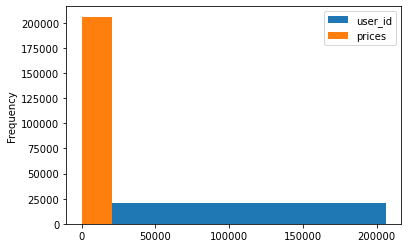

In [140]:
df.groupby(['user_id','order_id']).prices.sum().reset_index().groupby('user_id').prices.mean().reset_index().plot.hist()